<a href="https://colab.research.google.com/github/rajkumarshahu/AI-Colab/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <b><h1>Predictive Analysis for Heart Disease:</h1></b><br>
<h2>Evaluating Machine Learning Models</h2></center>

In [ ]:
!pip install shap


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
import shap
import xgboost as xgb

#Data Exploration and Cleaning

#### Load the data

In [3]:
data = pd.read_csv("/content/heart_2022_with_nans.csv", delimiter=None, engine='python')
print(data.head())

     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         8.0          NaN             

#### Summary statistics

In [4]:
summary_statistics = data.describe(include='all')
summary_statistics

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,445132,445132,443934,434205.000000,436065.000000,436824,444039,439679.000000,433772,442067,...,416480.000000,403054.000000,396326.000000,398558,379005,398011,368092,362616,394509,394368
unique,54,2,5,NaN,NaN,4,2,NaN,4,2,...,NaN,NaN,NaN,2,2,2,2,4,2,3
top,Washington,Female,Very good,NaN,NaN,Within past year (anytime less than 12 months ...,Yes,NaN,None of them,No,...,NaN,NaN,NaN,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
freq,26152,235893,148444,NaN,NaN,350944,337559,NaN,233455,416959,...,NaN,NaN,NaN,210891,249919,209256,215604,121493,377324,270055
mean,NaN,NaN,NaN,4.347919,4.382649,NaN,NaN,7.022983,NaN,NaN,...,1.702691,83.074470,28.529842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,8.688912,8.387475,NaN,NaN,1.502425,NaN,NaN,...,0.107177,21.448173,6.554889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,...,0.910000,22.680000,12.020000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,6.000000,NaN,NaN,...,1.630000,68.040000,24.130000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,7.000000,NaN,NaN,...,1.700000,80.740000,27.440000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.000000,5.000000,NaN,NaN,8.000000,NaN,NaN,...,1.780000,95.250000,31.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Check and handle missing values

In [5]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

missing_values_after_handling = data.isnull().sum()
missing_values_after_handling

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

# Visualizing Data Distribution


#### 1. Outcome Variable

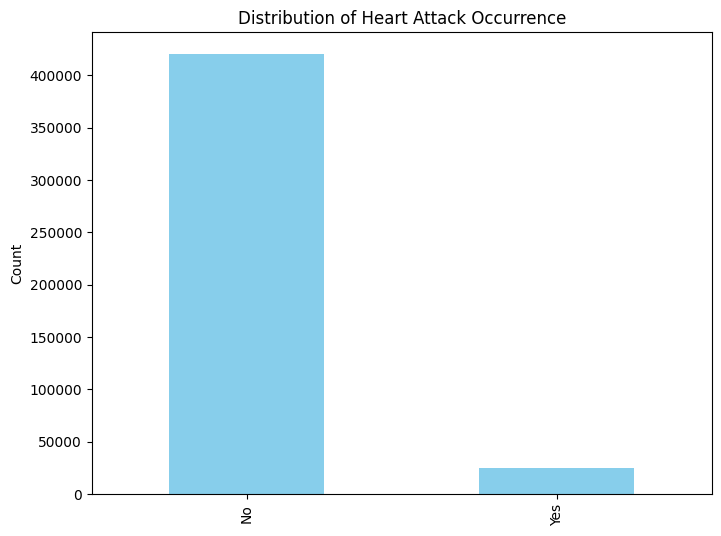

In [6]:
plt.figure(figsize=(8, 6))
data['HadHeartAttack'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Heart Attack Occurrence')
plt.ylabel('Count')
plt.show()

#### 2. Health Metrics

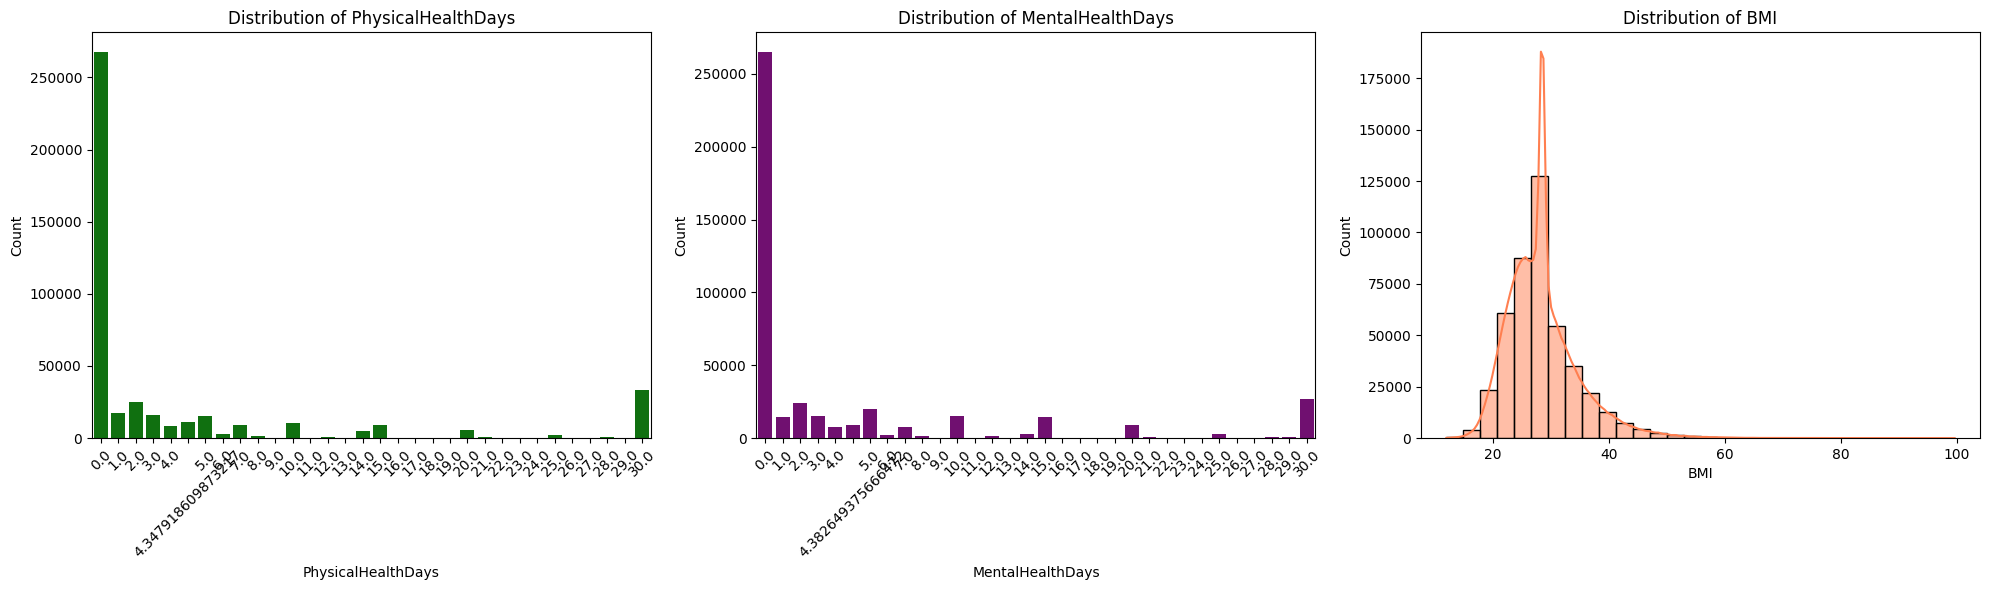

In [7]:
plt.figure(figsize=(20, 6))

# 1. PhysicalHealthDays
plt.subplot(1, 3, 1)
sns.countplot(data=data, x='PhysicalHealthDays', color='green')
plt.title('Distribution of PhysicalHealthDays')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis tick labels

# 2. MentalHealthDays
plt.subplot(1, 3, 2)
sns.countplot(data=data, x='MentalHealthDays', color='purple')
plt.title('Distribution of MentalHealthDays')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis tick labels

# 3. BMI
plt.subplot(1, 3, 3)
sns.histplot(data['BMI'], kde=True, color='coral', bins=30)
plt.title('Distribution of BMI')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Three subplots were created to visualize the distribution of health metrics:

- <b>PhysicalHealthDays</b>: This plot shows the distribution of the number of days subjects reported having physical health problems.
- <b>MentalHealthDays</b>: This plot shows the distribution of the number of days subjects reported having mental health issues.
- <b>BMI (Body Mass Index)</b>: A histogram was plotted to display the distribution of BMI values among the subjects.

We can infer from these visualizations the prevalence of heart attacks and the general health metrics of the subjects in the dataset.

#### 3. Lifestyle Habits

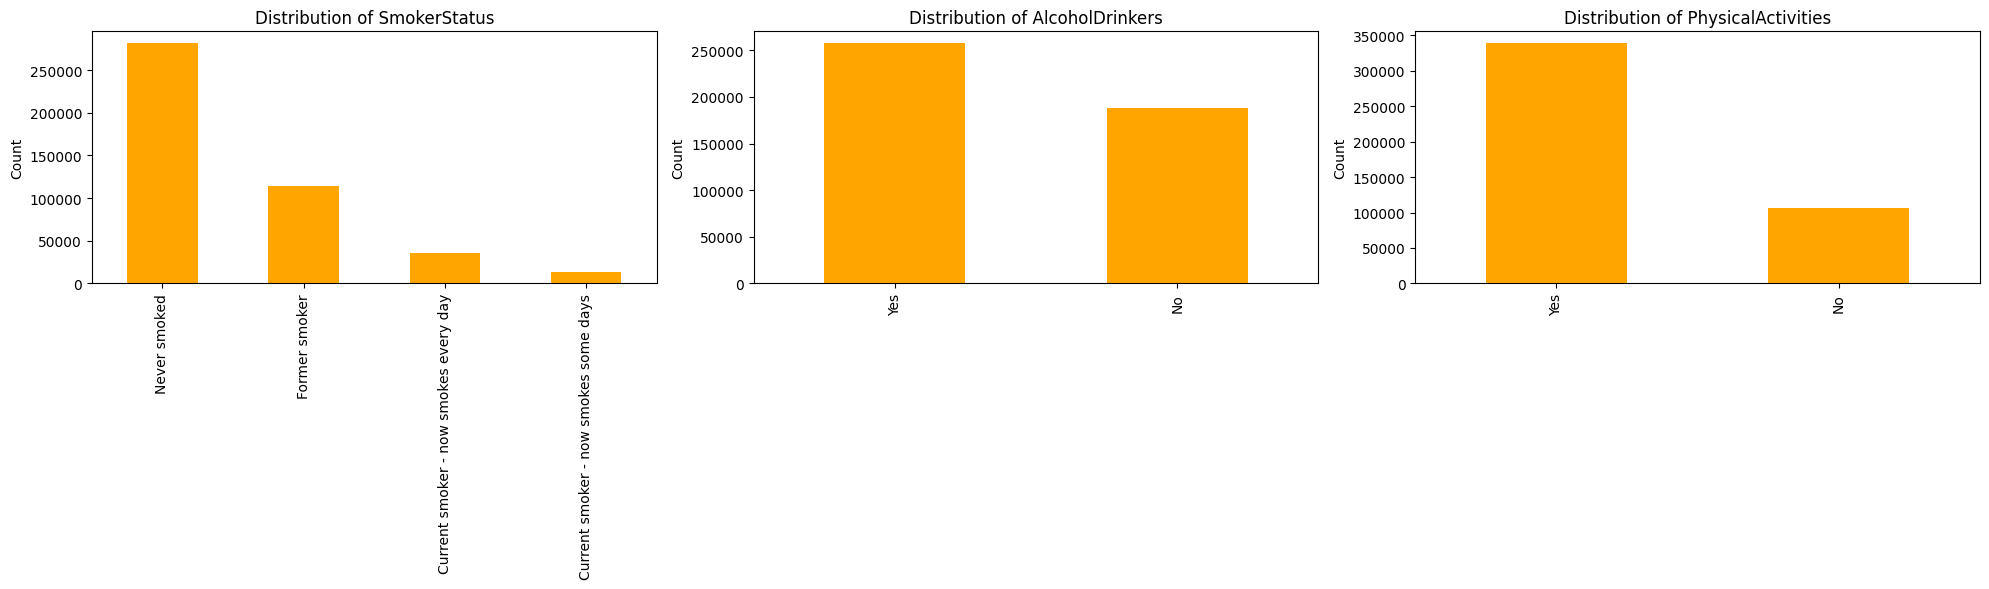

In [8]:
plt.figure(figsize=(20, 6))
lifestyle_habits = ['SmokerStatus', 'AlcoholDrinkers', 'PhysicalActivities']
for i, col in enumerate(lifestyle_habits, 1):
    plt.subplot(1, 3, i)
    data[col].value_counts().plot(kind='bar', color='orange')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

Three bar charts were plotted to visualize the distribution of various lifestyle habits among the subjects:

- <b>SmokerStatus</b>: Indicates the smoking status of subjects.
- <b>AlcoholDrinkers</b>: Represents subjects who consume alcohol.
- <b>PhysicalActivities</b>: Shows whether subjects engage in physical activities.

#### 4. Other Health Conditions

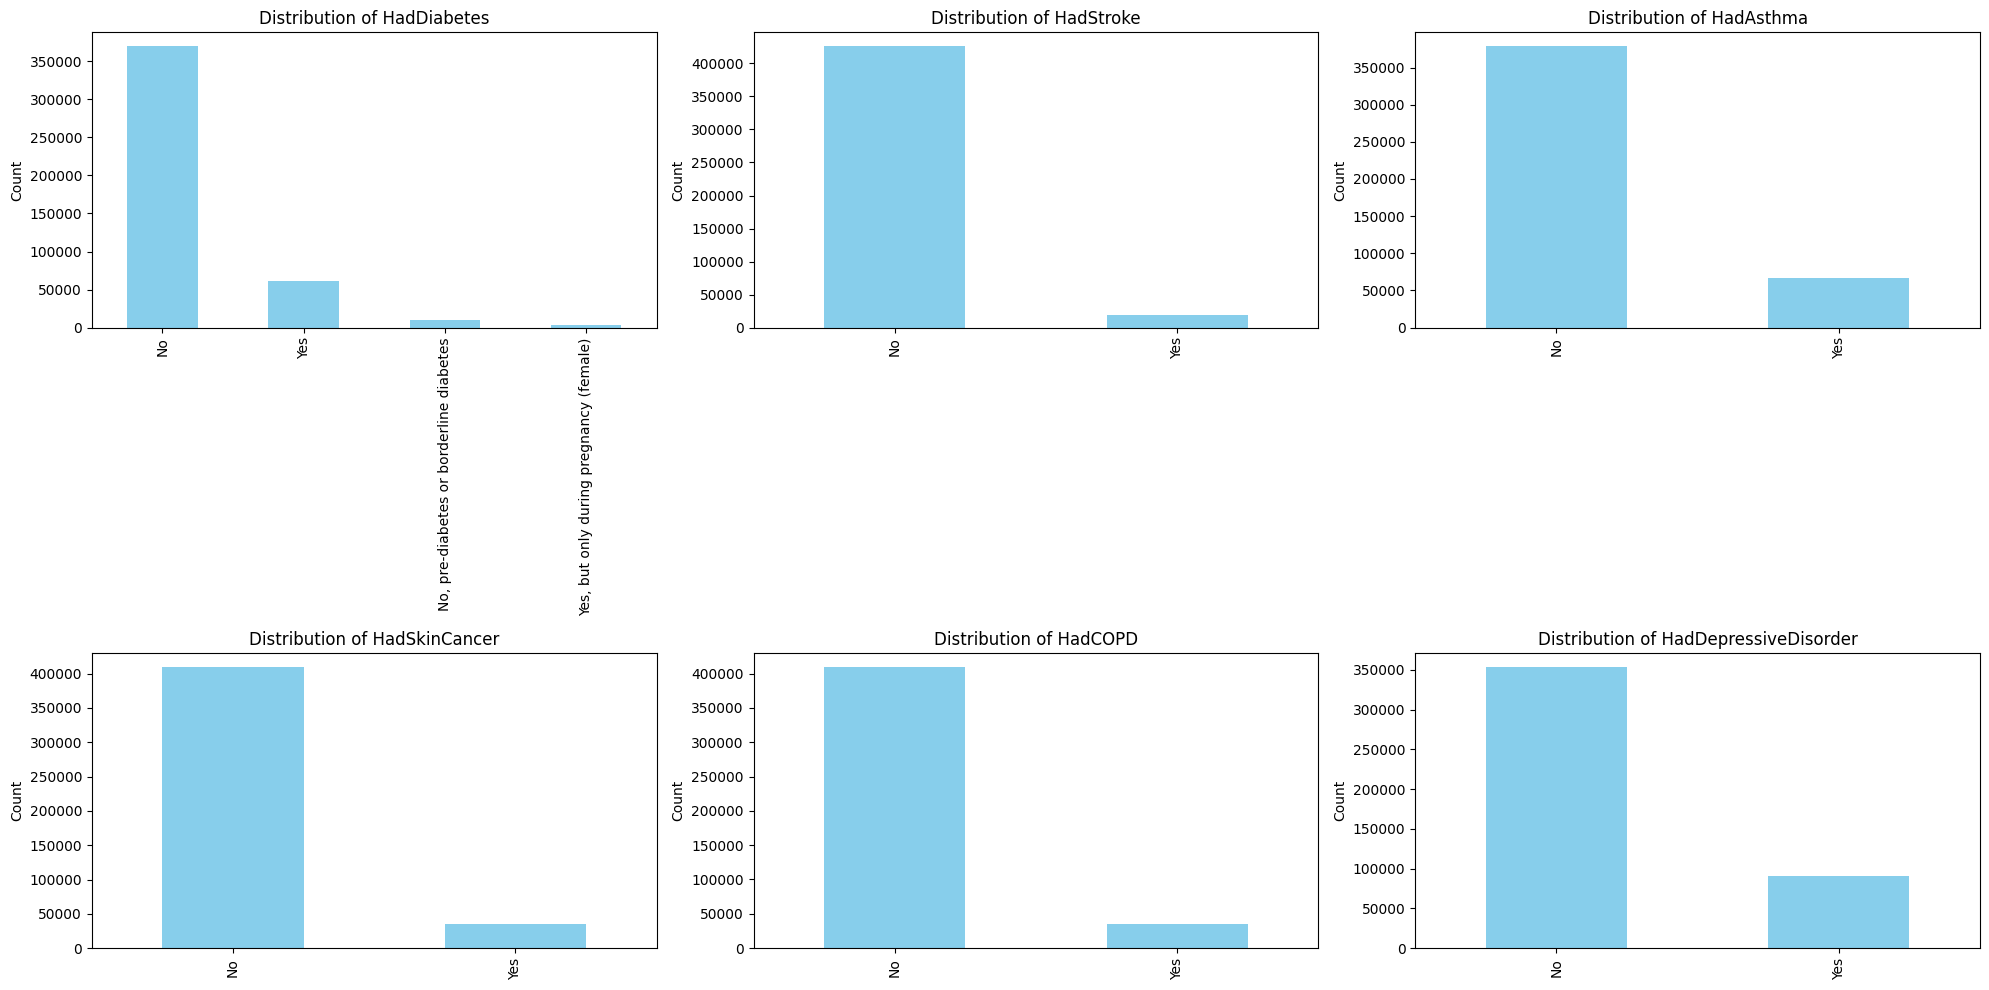

In [9]:
plt.figure(figsize=(20, 10))
health_conditions = ['HadDiabetes', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder']
for i, col in enumerate(health_conditions, 1):
    plt.subplot(2, 3, i)
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

Six bar charts were generated to visualize the distribution of various health conditions among the subjects:

- <b> HadDiabetes</b>: Indicates if subjects have been diagnosed with diabetes.
- <b>HadStroke</b>: Represents subjects who have had a stroke.
- <b>HadAsthma</b>: Indicates subjects diagnosed with asthma.
- <b>HadSkinCancer</b>: Represents subjects who have had skin cancer.
- <b>HadCOPD (Chronic Obstructive Pulmonary Disease)</b>: Indicates if subjects have COPD.
- <b>HadDepressiveDisorder</b>: Represents subjects diagnosed with depressive disorder.

#### 5. General Health Perception

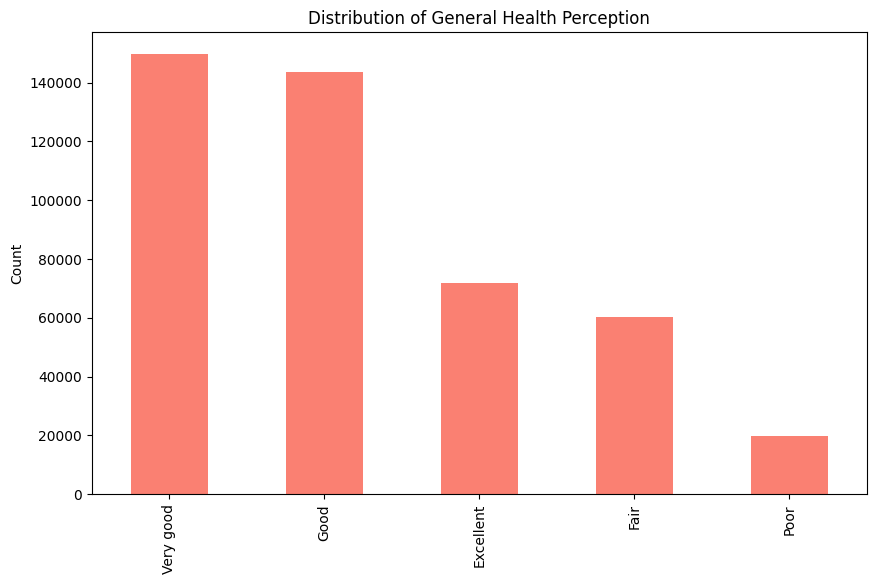

In [10]:
plt.figure(figsize=(10, 6))
data['GeneralHealth'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of General Health Perception')
plt.ylabel('Count')
plt.show()

A bar chart was plotted to visualize the general health perception of the subjects. The categories range from "Excellent" to "Poor."

The visualizations provide a comprehensive understanding of the lifestyle habits, health conditions, and general health perception of the subjects in the dataset.

#### 6. Age Distribution

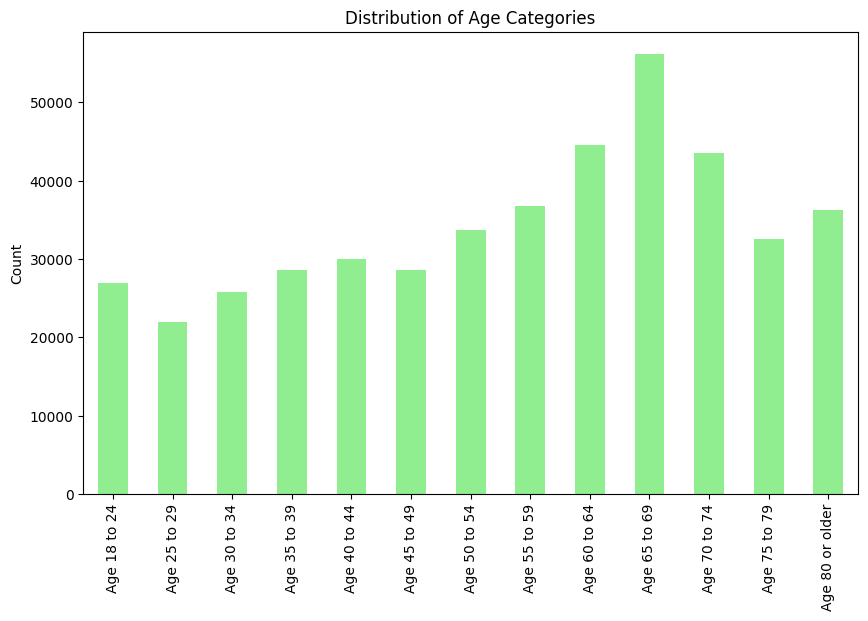

In [11]:
plt.figure(figsize=(10, 6))
data['AgeCategory'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Age Categories')
plt.ylabel('Count')
plt.show()

A bar chart was constructed to visualize the distribution of age categories among the subjects. The age categories are represented in intervals, providing insights into the age distribution of the dataset.

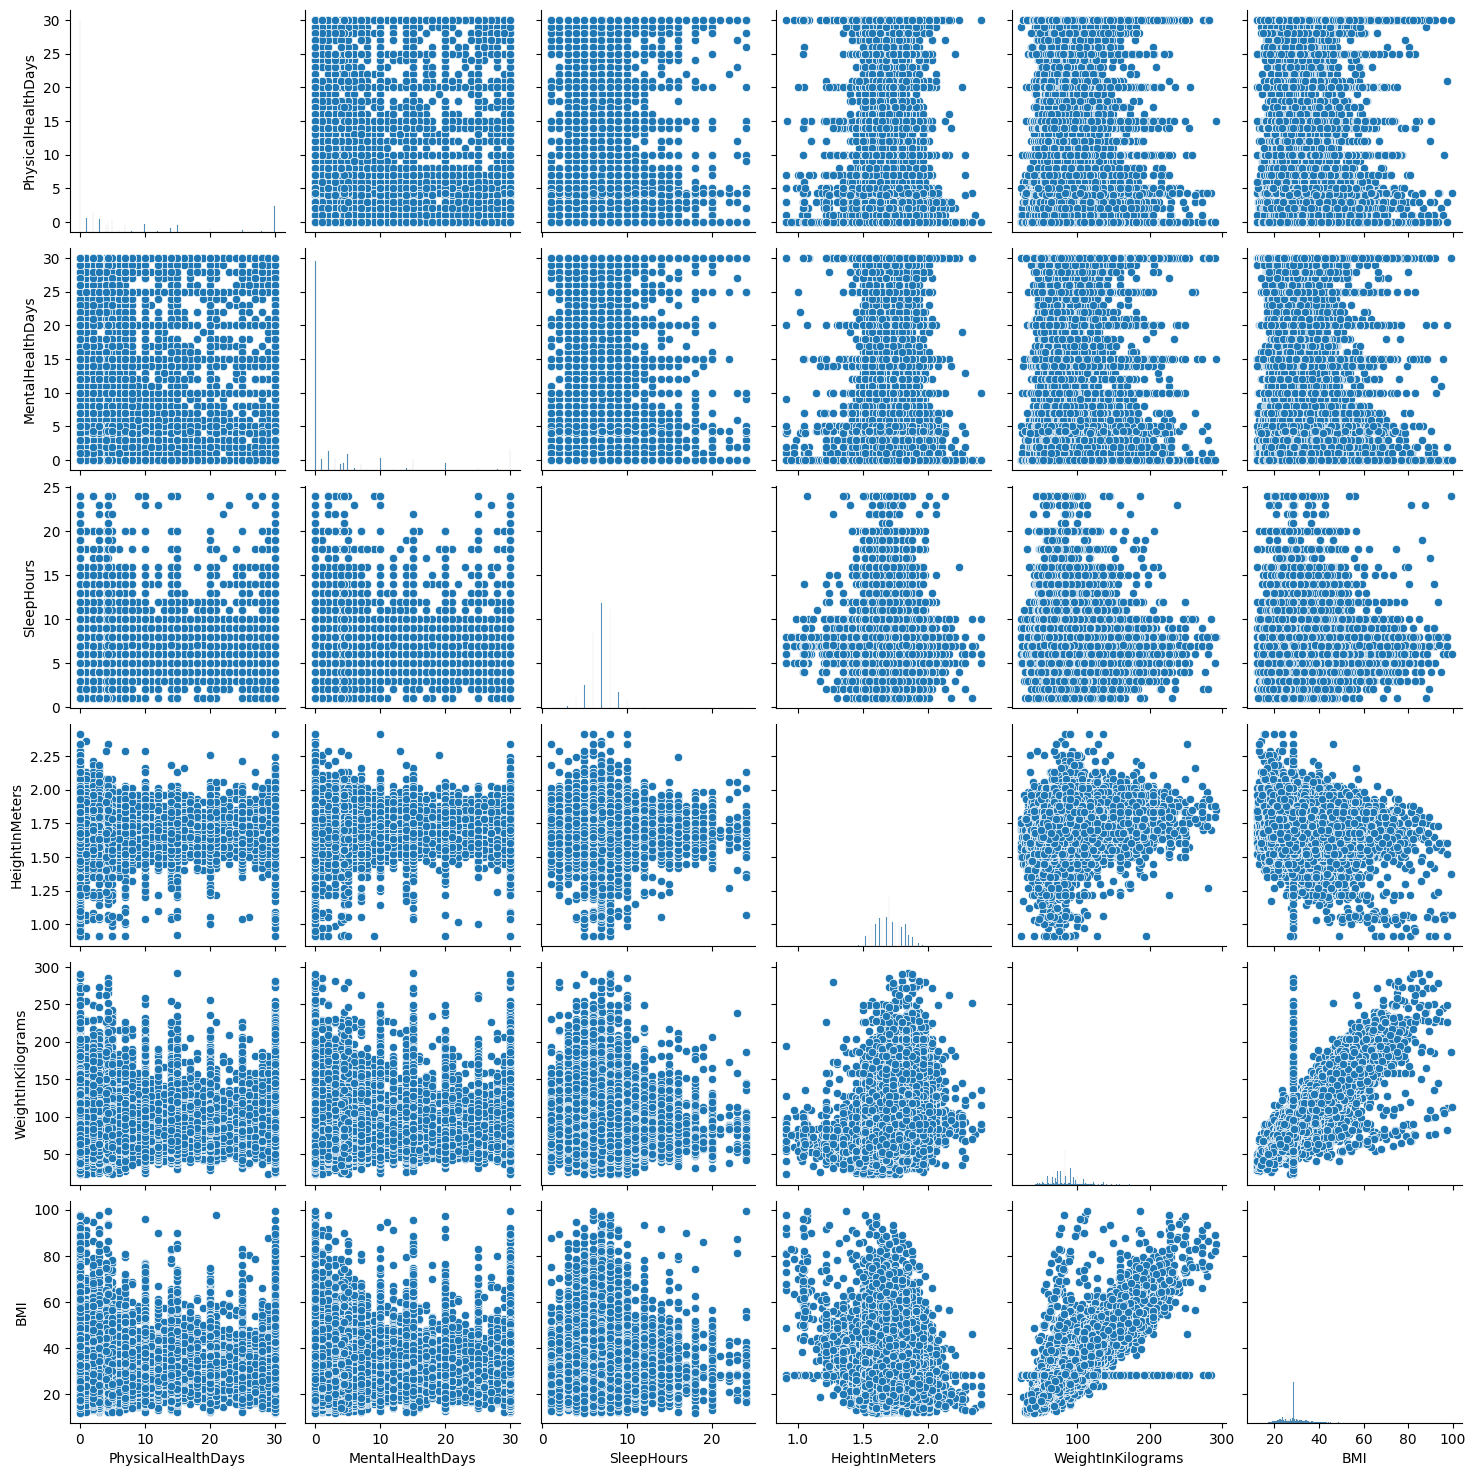

In [12]:
sns.pairplot(data)

A pair plot was generated to visualize pairwise relationships between the various features in the dataset. Pair plots are especially helpful in understanding the distributions of individual variables and the relationships between two variables.

# Feature Engineering and Feature Selection

#### One-hot encoding categorical variables
Categorical variables such as 'SmokerStatus', 'GeneralHealth', 'RaceEthnicityCategory', 'AgeCategory', 'PhysicalActivities', and 'LastCheckupTime' were transformed using one-hot encoding. This process converts categorical data into a format that can be provided to machine learning algorithms to improve predictions.

In [13]:
data_encoded = pd.get_dummies(data, columns=['SmokerStatus', 'GeneralHealth', 'RaceEthnicityCategory', 'AgeCategory', 'PhysicalActivities', 'LastCheckupTime'])

#### Convert the target variable 'HadHeartAttack' to binary format
The target variable, 'HadHeartAttack', which indicates whether a subject had a heart attack, was converted to a binary format.



In [14]:
data_encoded['HadHeartAttack'] = data_encoded['HadHeartAttack'].map({'No': 0, 'Yes': 1})

#### Compute correlations only for numeric columns
Correlations between the target variable ('HadHeartAttack') and other numeric variables were computed. Correlations provide insights into the relationship between variables and can help in feature selection.

In [15]:
correlations = data_encoded.select_dtypes(include=['int64', 'float64', 'uint8']).corr()['HadHeartAttack'].sort_values(ascending=False)


#### Select relevant features based on correlation with target
Based on the computed correlations, features with an absolute correlation value greater than 0.05 with the target variable were selected as relevant features. This step ensures that only features that have a significant relationship with the target variable are used for modeling.


In [16]:
relevant_features = correlations[abs(correlations) > 0.05].index.tolist()

#### Data Cleaning
Some columns, such as 'WeightInKilograms' and 'PhysicalActivities_No', were removed from the dataset.

In [17]:
data_selected = data_encoded.drop(columns=['WeightInKilograms', 'PhysicalActivities_No'])

#### Selecting relevant features based on correlation with target
The target variable 'HadHeartAttack' was safely removed from the list of relevant features to ensure it is not used as a predictor.

In [18]:
if 'HadHeartAttack' in relevant_features:
    relevant_features.remove('HadHeartAttack')

# Model Selection and Training

#### Splitting the data into training and testing sets (80% train, 20% test)


In [19]:
X = data_encoded[relevant_features]
y = data_encoded['HadHeartAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Cross-validation with various models


In [34]:
# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000)  # Increased max_iter
}

for model_name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    print(f"{model_name} - Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")


Random Forest - Accuracy: 0.9428 (+/- 0.0002)
Gradient Boosting - Accuracy: 0.9436 (+/- 0.0000)
XGBoost - Accuracy: 0.9436 (+/- 0.0000)
Logistic Regression - Accuracy: 0.9436 (+/- 0.0000)
Random Forest - Accuracy: 0.9428 (+/- 0.0001)


All models have achieved roughly 94% accuracy, indicating strong performance. The consistency across different data subsets is confirmed by the near-zero variance. Gradient Boosting, XGBoost, and Logistic Regression marginally outperform Random Forest. However, besides accuracy, factors like interpretability, training time, and specific use-case requirements should influence the final model choice. Additionally, it's essential to ensure the models aren't overfitting and to consider other metrics for a comprehensive evaluation.

#### Train Multiple Models and Evaluate their performances


In [21]:
# Define models to train
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    # 'Support Vector Machine': SVC(random_state=42)  # SVM might be computationally expensive for large datasets
}

# Train models and evaluate their performances
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name}")
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(classification_report(y_test, y_pred))


Logistic Regression
Accuracy: 94.23%


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     83889
           1       0.00      0.00      0.00      5138

    accuracy                           0.94     89027
   macro avg       0.47      0.50      0.49     89027
weighted avg       0.89      0.94      0.91     89027


Random Forest
Accuracy: 94.15%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     83889
           1       0.22      0.01      0.01      5138

    accuracy                           0.94     89027
   macro avg       0.58      0.50      0.49     89027
weighted avg       0.90      0.94      0.91     89027


Gradient Boosting
Accuracy: 94.23%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     83889
           1       0.00      0.00      0.00      5138

    accuracy                           0.94     89027
   macro avg       0.47      0.50      0.49     89027
weight

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


- <b>Logistic Regression </b>: This model attained an accuracy of roughly 94.23%. However, it did not predict any instances of the minority class, as evidenced by a recall of 0% for class 1.
-  <b> Random Forest </b>: The model achieved an accuracy of approximately 94.15%. Much like the Logistic Regression model, it faced challenges in predicting the minority class.
-  <b>Gradient Boosting </b>: The model achieved an accuracy of approximately 94.23%, encountered similar challenges due to the class imbalance.

The models displayed commendable accuracy figures. However, a more in-depth evaluation of the metrics revealed a pronounced class imbalance in the dataset. To elucidate:

- The majority class (label 0) predominates, leading to models that predominantly predict this class.
- Conversely, the minority class (label 1) is underrepresented, resulting in models that grapple with accurately predicting instances of this class.

The results above show a clear indication of a class imbalance problem. The models are predicting the majority class (0) almost exclusively and are struggling to predict the minority class (1).

The results provide valuable insights:

**1. High Accuracy, But Imbalanced Predictions:** All models have high accuracy, but this can be misleading due to the class imbalance in the dataset. As seen in the results, the models predict the majority class almost exclusively. The accuracy is high because the majority class (0) has a much larger representation in the dataset compared to the minority class (1).

**2. Warnings Related to Precision and F-score:** The warnings indicate that for some models, no samples were predicted for the minority class (1). This is further evidence of the models' inability to effectively predict the minority class due to the imbalance.

**3. Recall for Minority Class is Low:** Even in the Random Forest model, where some samples of the minority class were predicted, the recall for that class is very low, indicating that the model missed a large proportion of actual positive cases.

# Addressing Class Imbalance for Improved Heart Disease Prediction

#### Oversampling with SMOTE
To mitigate the class imbalance issue, the Synthetic Minority Over-sampling Technique (SMOTE) was employed. This method works by generating synthetic samples in the feature space, helping to balance the dataset by oversampling the minority class.

In [22]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

#### Using Class Weights with Random Forest
Another strategy employed was to adjust class weights within the Random Forest model. By setting the `class_weight` parameter to 'balanced', the model assigns higher weights to the minority class, making it more sensitive to it.

In [23]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)

#### Evaluating with ROC-AUC
After implementing the aforementioned strategies, the model's performance was assessed using the ROC-AUC score, which measures the model's ability to distinguish between the positive and negative classes.

In [24]:
model.fit(X_resampled, y_resampled)

y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc:.2f}")

ROC-AUC: 0.76


The obtained ROC-AUC score was `0.76`, suggesting a commendable capability to differentiate between subjects with and without heart disease.An ROC-AUC score of `0.76` is a reasonably good result, especially considering the challenges posed by imbalanced datasets. Here's a brief interpretation of the score:

- An ROC-AUC score of `0.5` means the model's predictions are no better than random guessing.
- A perfect model would have an ROC-AUC score of `1.0`.
- The score of `0.76` indicates that the model has a good capability to distinguish between the positive class (having heart disease) and the negative class (not having heart disease).

# Comprehensive Model Evaluation and Enhancement

#### Use the default Random Forest model for a baseline



In [25]:

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81     83889
           1       0.12      0.73      0.21      5138

    accuracy                           0.69     89027
   macro avg       0.55      0.71      0.51     89027
weighted avg       0.93      0.69      0.77     89027



- <b>Recall for Positive Class</b>: The recall for the positive class (indicating heart disease) has markedly improved to 0.73 from nearly 0 in previous models. This uplift is significant, especially in medical domains where false negatives can have serious implications.

- <b>Precision for Positive Class</b>: The precision for the positive class remains low at 0.12. While the model now identifies a larger proportion of heart disease cases, it also misclassifies many non-disease cases as positive. This phenomenon is a common trade-off in imbalanced datasets.

The results indicate a significant improvement in the recall for the positive class (indicating heart disease) when compared to the previous results. The positive class has jumped to 0.73 from nearly 0. This is a significant achievement, especially for medical applications, where false negatives can be detrimental.

However, the precision for the positive class is low, which means that while the model is catching a large proportion of the actual heart disease cases, it's also misclassifying many healthy cases as having heart disease. This is a trade-off often encountered when dealing with imbalanced datasets.

#### Feature Importance


Since we've been working with a Random Forest model, we can easily extract feature importances to understand which features are the most influential in making predictions. Using the Random Forest model, feature importances were extracted to discern the most influential predictors. Two visualizations were provided, both highlighting the significance of various features in predicting heart disease.

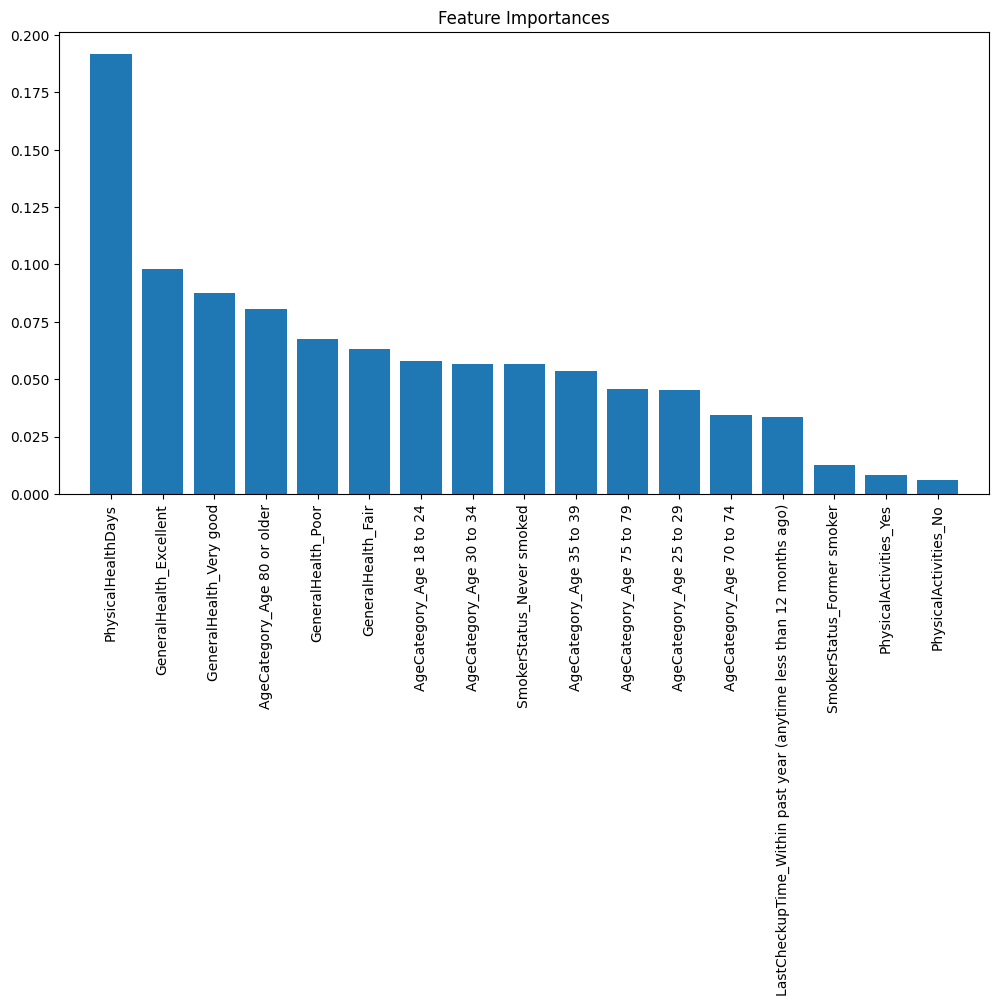

In [26]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

The feature importance plots offer valuable insights into which attributes are pivotal for the model's predictions. Understanding these importances can guide medical practitioners and researchers in focusing on specific factors when assessing heart disease risk.

####Feature Importance from RandomForest

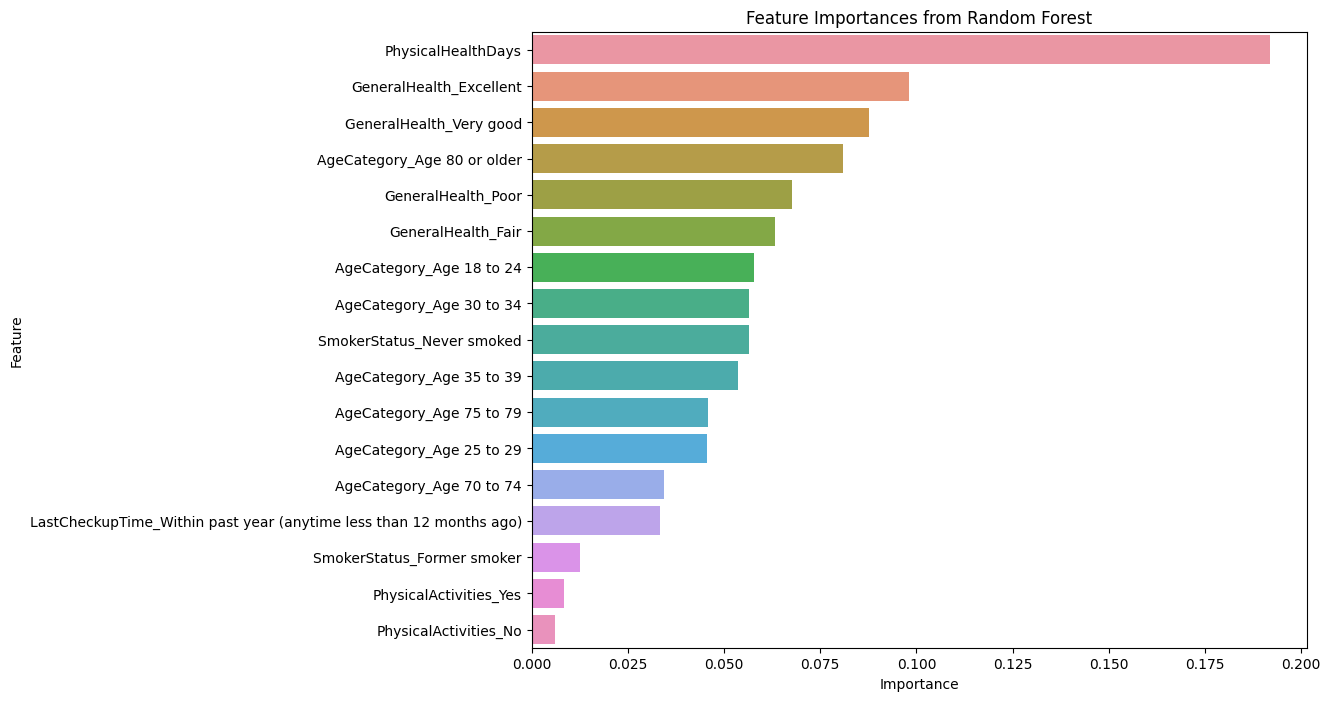

In [27]:
# Extract feature importances from the model
feature_importances = rf.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': feature_importances
})

# Sort and plot
features_df = features_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances from Random Forest')
plt.show()


#### Sample Data for SHAP (SHapley Additive exPlanations) Values:
SHAP values are a powerful tool used to interpret the output of machine learning models. They provide insights into the impact of each feature on the model's predictions for individual instances.


In [28]:
# Define the explainer
explainer = shap.TreeExplainer(rf)


# Sample a subset of the test set
sample_idx = np.random.choice(X_test.shape[0], 500, replace=False)  # Adjust the sample size as needed
X_sample = X_test.iloc[sample_idx]

# Compute SHAP values for the sample
shap_values_sample = explainer.shap_values(X_sample)


#### Summarize SHAP Values
To compute SHAP values without high computational costs, a subset of the test set was sampled.

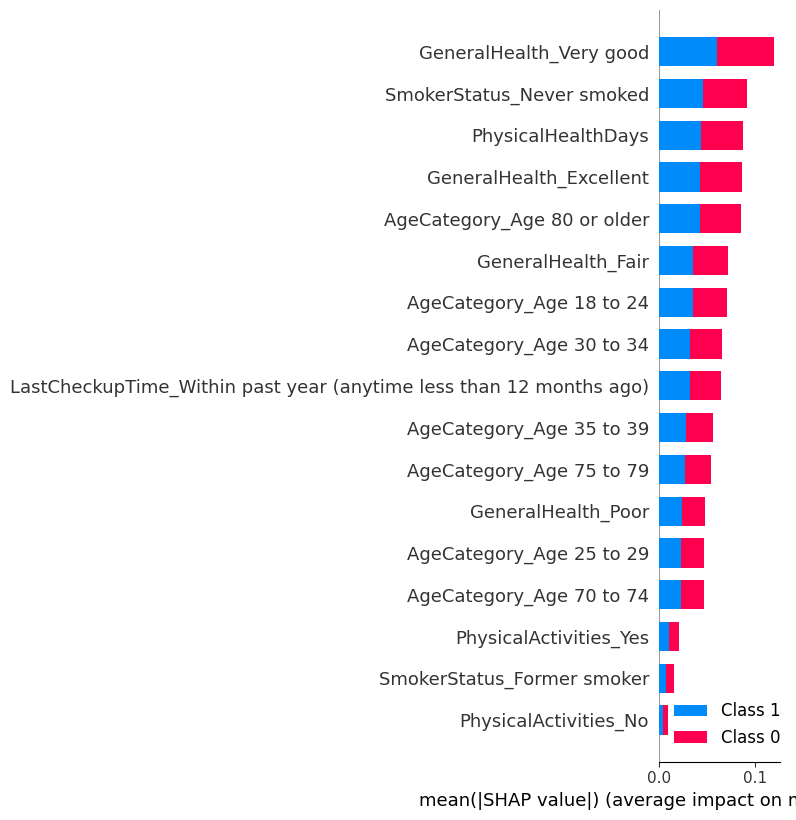

In [29]:
shap.summary_plot(shap_values_sample, X_sample)

A SHAP summary plot was generated, displaying the influence of each feature on the model's predictions. This visualization allows for an understanding of feature contributions and can be crucial for interpreting and explaining model predictions.



# Model Comparison & Evaluation

As the title of the project suggests evaluating multiple models, let's compare our Random Forest model with other potential models, such as Gradient Boosting and XGBoost.

#### Training Gradient Boosting


Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.98      0.66      0.79     83889
           1       0.12      0.78      0.21      5138

    accuracy                           0.67     89027
   macro avg       0.55      0.72      0.50     89027
weighted avg       0.93      0.67      0.76     89027



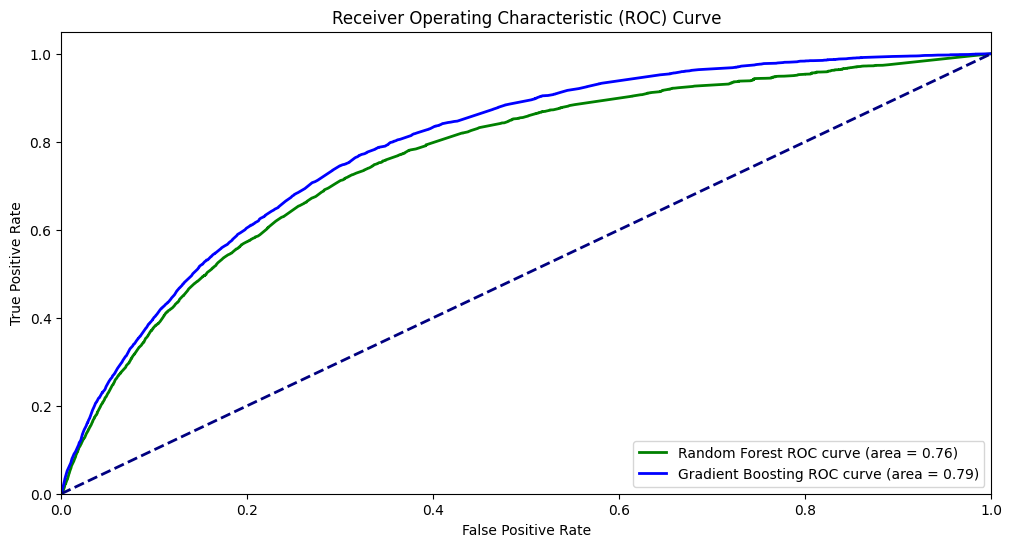

In [30]:
gb = GradientBoostingClassifier()
gb.fit(X_resampled, y_resampled)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gb))

# Calculate the ROC curve points for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate the ROC curve points for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot the ROC curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label=f'Gradient Boosting ROC curve (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

A Gradient Boosting model was trained using the resampled data.The evaluation results for the Gradient Boosting model showed a significant improvement in recall for the positive class, achieving a recall value of 0.78. However, precision remains low, indicating a higher number of false positives.

#### Training XGBoost
XGBoost demonstrates a high recall for the positive class, achieving a recall value of 0.76. As before, precision remains low, reflecting the trade-off between sensitivity and false positive rates in imbalanced datasets.

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.98      0.68      0.80     83889
           1       0.13      0.76      0.22      5138

    accuracy                           0.68     89027
   macro avg       0.55      0.72      0.51     89027
weighted avg       0.93      0.68      0.77     89027



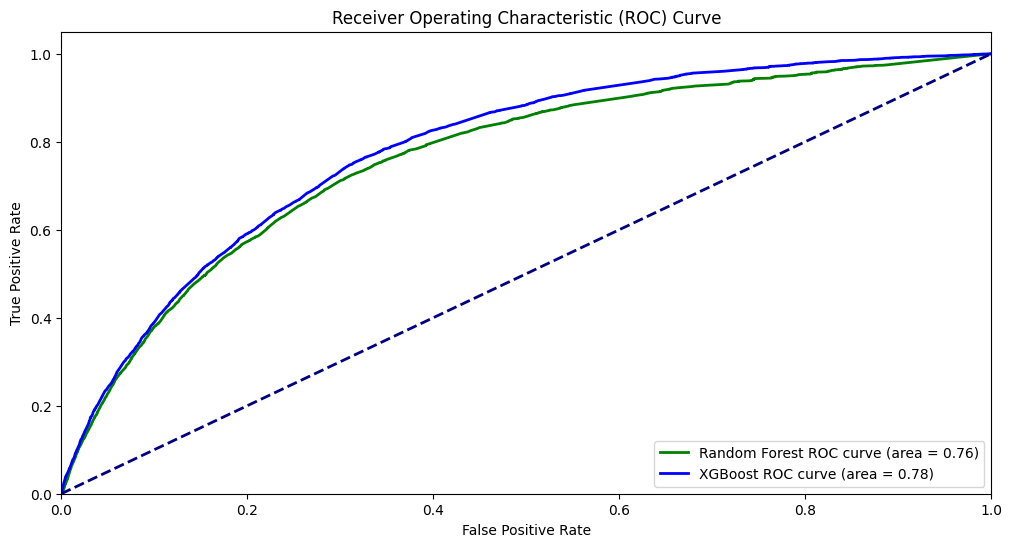

In [31]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_resampled, y_resampled)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))

# Calculate the ROC curve points for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate the ROC curve points for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Train Logistic Regression

Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.69      0.81     83889
           1       0.13      0.76      0.22      5138

    accuracy                           0.69     89027
   macro avg       0.55      0.73      0.52     89027
weighted avg       0.93      0.69      0.77     89027

ROC-AUC: 0.73
------------------------------------------------------------


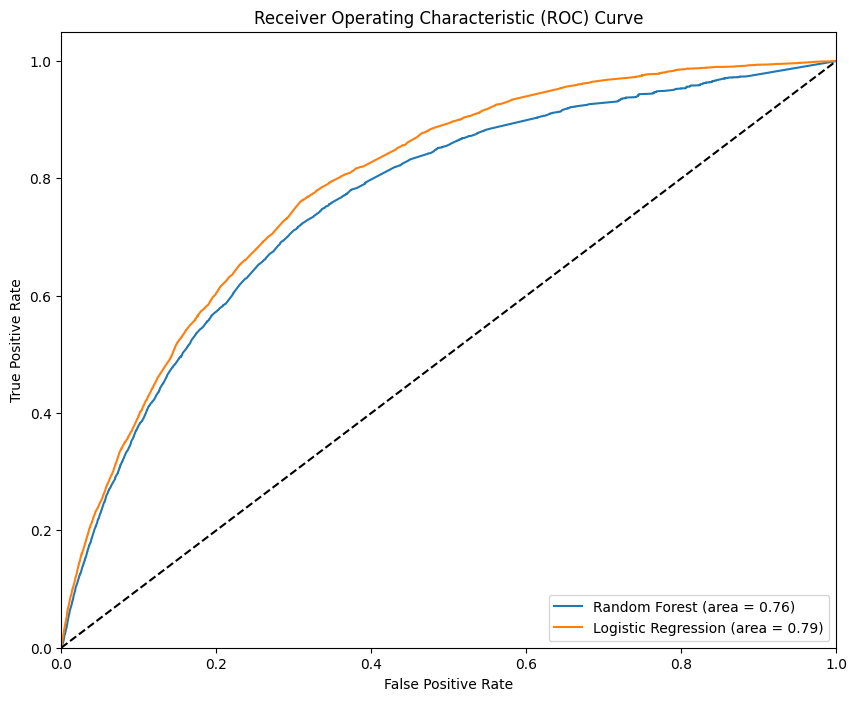

In [32]:
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_resampled, y_resampled)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate Performance
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)
print(f"ROC-AUC: {roc_auc_logreg:.2f}")
print("-" * 60)

# ROC Curve comparison
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_lr, tpr_lr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(10,8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {roc_auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


The ROC-AUC score for the Logistic Regression model is 0.73, suggesting a solid ability to differentiate between subjects with and without heart disease.

#Comparative ROC-AUC Analysis of Classifiers

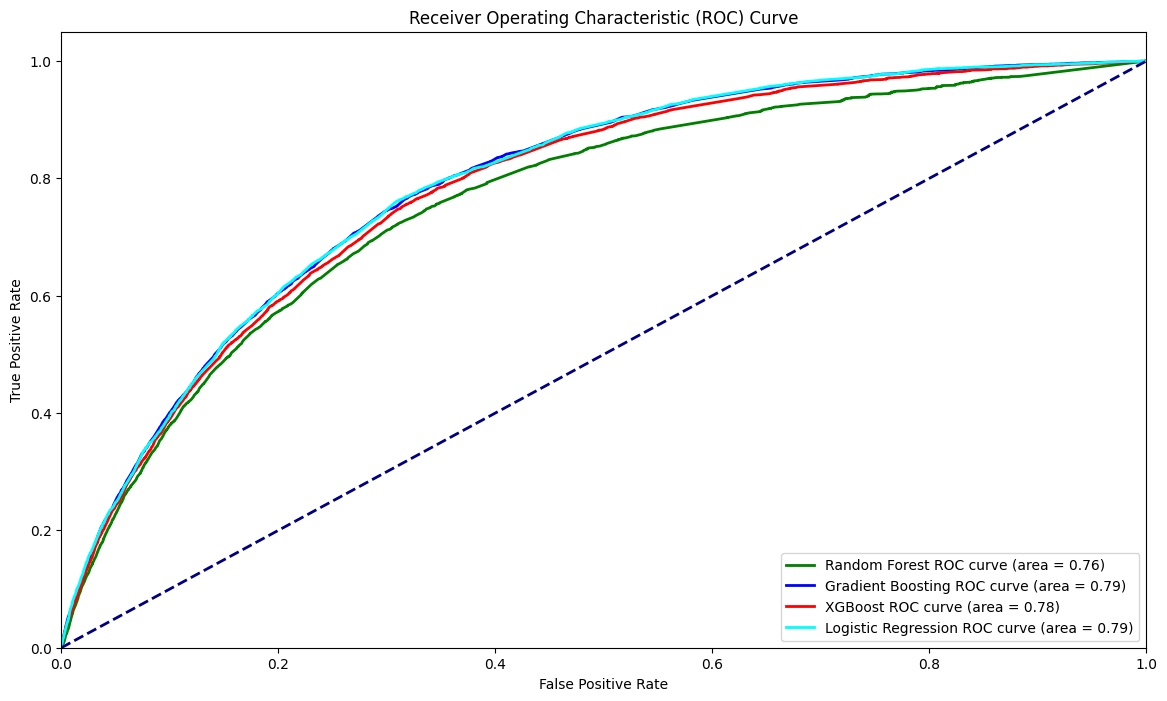

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the ROC curve points for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate the ROC curve points for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Calculate the ROC curve points for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Calculate the ROC curve points for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot the ROC curves
plt.figure(figsize=(14, 8))

# Plot Random Forest ROC
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')

# Plot Gradient Boosting ROC
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label=f'Gradient Boosting ROC curve (area = {roc_auc_gb:.2f})')

# Plot XGBoost ROC
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.2f})')

# Plot Logistic Regression ROC
plt.plot(fpr_lr, tpr_lr, color='cyan', lw=2, label=f'Logistic Regression ROC curve (area = {roc_auc_lr:.2f})')

# Plot the random line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set the limits, labels, title and legend
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


1. **ROC Curve Overview:**
The ROC curve is a graphical representation of the true positive rate (sensitivity) against the false positive rate (1-specificity) for various threshold values. An ideal model would have a ROC curve that shoots straight up the y-axis (true positive rate) and then to the right along the top border, indicating perfect classification. The 45-degree dashed line represents the performance of a random classifier (i.e., a model with no discriminatory power). The further away the curve is from this line, the better the model is at classification.

2. **Analysis of Each Model:**
- **Random Forest:** The area under the ROC curve (AUC) for this model is 0.76. This means the Random Forest model can distinguish between the positive and negative classes 76% of the time, which is reasonably good.

- **Gradient Boosting:** With an AUC of 0.79, this model slightly outperforms the Random Forest model in terms of classification power.

- **XGBoost:** The AUC for XGBoost is 0.78. This suggests that the model's performance is very similar to Gradient Boosting and marginally better than Random Forest.

- **Logistic Regression:** With an AUC score also at 0.79, the Logistic Regression model is on par with Gradient Boosting, showcasing good discriminatory power between classes.

3. **Comparing Models:**
The Gradient Boosting and Logistic Regression models appear to perform the best out of the four, both having an AUC of 0.79. However, their performance is closely followed by XGBoost with an AUC of 0.78 and Random Forest with an AUC of 0.76.

In conclusion, all four models demonstrate reasonably good performance, with Gradient Boosting and Logistic Regression marginally outperforming the others. However, the choice between these models would depend on other factors like computational efficiency, interpretability, and the specific business context.